# SQL Connection

Establish a connection to the DB2 IMB database to run queries in SQL. The credentials here belong to the author, but feel free to run the code, it should work. 

In [1]:
#install database 

#pip install ibm_db

In [2]:
#import database

import ibm_db

In [4]:
#database credentials 

dsn_hostname = "dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net" # e.g.: "dashdb-txn-sbox-yp-dal09-04.services.dal.bluemix.net"
dsn_uid = "vwg33041"       # e.g. "abc12345"
dsn_pwd = "fvnptbv3w7df^81v"      # e.g. "7dBZ3wWt9XN6$o0J"
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "50000"                # e.g. "50000" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"

In [5]:
#Create database connection

dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd)

try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  vwg33041 on host:  dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net


In [6]:
#print the connection string to check correct values are specified

print(dsn)

DRIVER={IBM DB2 ODBC DRIVER};DATABASE=BLUDB;HOSTNAME=dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net;PORT=50000;PROTOCOL=TCPIP;UID=vwg33041;PWD=fvnptbv3w7df^81v;


In [7]:
#Retrieve Metadata for the Database Server

server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)

DBMS_NAME:  DB2/LINUXX8664
DBMS_VER:   11.01.0404
DB_NAME:    BLUDB


In [8]:
#Retrieve Metadata for the Database Client / Driver

client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)

DRIVER_NAME:           DB2CLI.DLL
DRIVER_VER:            11.01.0405
DATA_SOURCE_NAME:      BLUDB
DRIVER_ODBC_VER:       03.51
ODBC_VER:              03.01.0000
ODBC_SQL_CONFORMANCE:  EXTENDED
APPL_CODEPAGE:         1252
CONN_CODEPAGE:         1208


In [9]:
#import furthe relevant libraries 

import pandas as pd
import ibm_db_dbi

In [10]:
#connection to pandas

pconn = ibm_db_dbi.Connection(conn)

In [11]:
# query statement to retrieve all rows in TWEETS table

selectQuery = "select * from TWEETS"

# #retrieve the query results into a pandas dataframe
df_tweets = pd.read_sql(selectQuery, pconn)

In [12]:
#print just the text for first row in the pandas data frame

df_tweets.text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [13]:
#print the first 5 rows of the data frame

df_tweets.head()

Column_0  target          id                          date      flag  \
0         0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1         1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2         2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3         3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4         4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF     my whole body feels itchy and like its on fire  
4           Karoli  @nationwideclass no, it's not behaving at all....

In [14]:
df_tweets.shape

(1600000, 7)

In [81]:
## Remove column name 'Column_0' 

#df.drop(['A'], axis = 1) 
df_tweets = df_tweets.drop(['Column_0'], axis = 1)

In [82]:
df_tweets.head()

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF     my whole body feels itchy and like its on fire  
4           Karoli  @nationwideclass no, it's not behaving at all....

In [83]:
df_tweets.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [84]:
df_tweets.describe(include='all')

target            id                          date      flag  \
count   1.600000e+06  1.600000e+06                       1600000   1600000   
unique           NaN           NaN                        774363         1   
top              NaN           NaN  Mon Jun 15 12:53:14 PDT 2009  NO_QUERY   
freq             NaN           NaN                            20   1600000   
mean    2.000000e+00  1.998818e+09                           NaN       NaN   
std     2.000001e+00  1.935761e+08                           NaN       NaN   
min     0.000000e+00  1.467810e+09                           NaN       NaN   
25%     0.000000e+00  1.956916e+09                           NaN       NaN   
50%     2.000000e+00  2.002102e+09                           NaN       NaN   
75%     4.000000e+00  2.177059e+09                           NaN       NaN   
max     4.000000e+00  2.329206e+09                           NaN       NaN   

            user                      text  
count    1600000                   1600000  
unique    659775                   1580900  
top     lost_dog  isPlayer Has Died! Sorry  
freq         549                       210  
mean         NaN                       NaN  
std          NaN                       NaN  
min          NaN                       NaN  
25%          NaN                       NaN  
50%          NaN                       NaN  
75%          NaN                       NaN  
max          NaN                       NaN

In [16]:
#Exploratory Analysis: some users made various tweets on this dataset 

df_tweets['user'].value_counts()

lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
SongoftheOss       227
Jayme1988          225
keza34             219
ramdomthoughts     216
shanajaca          213
wowlew             212
TraceyHewins       211
nuttychris         211
thisgoeshere       207
Spidersamm         205
StDAY              202
felicityfuller     195
Dogbook            192
_magic8ball        189
Djalfy             182
Dutchrudder        182
torilovesbradie    182
twebbstack         180
Quimo              180
enamoredsoul       179
                  ... 
raphiev1             1
sawilhelm            1
gail731              1
jencro               1
vanessarogers        1
EmilyOsmentxo        1
TooMuchDebt          1
pearl126             1
KathrynJayne         1
cliffmcc             1
MiNeM                1
the1dynasty          1
andivan    

In [17]:
#only 600k plus unique individuals

len(df_tweets['user'].unique())

659775

In [88]:
df_tweets['user'].value_counts()

pandas.core.series.Series

In [90]:
df_tweets['user'].count()

1600000

In [18]:
#LET'S FIND THE USERS WITH THE MOST NUMBER OF TWEETS THAT ARE NEGATIVE
#SIGNIFYING DEPRESSION

#see what users had tweets w/ pos and neg sentiment 
df_user_sentiment = df_tweets[['user', 'target']]
df_user_sentiment.groupby(['user'], as_index = False).mean()

user    target
0          000catnap000  3.333333
1       000matthewkelly  4.000000
2             000yea000  4.000000
3             0010x0010  4.000000
4           001BabyGirl  4.000000
5              001trish  4.000000
6              006jazzy  0.000000
7           007LouiseOB  0.000000
8         007_Chris_007  2.000000
9             007buddha  0.000000
10             007peter  0.400000
11             007robbo  0.000000
12            007simple  0.000000
13            007wisdom  4.000000
14                00Ben  4.000000
15               00Davo  4.000000
16            00Desmond  0.000000
17              00Grine  0.000000
18          00Jessica81  0.000000
19              00KEVEN  0.000000
20          00KufiKyd00  0.000000
21            00Lucky00  0.000000
22               00Neji  1.000000
23           00ShaDix00  2.000000
24             00Sleepy  0.000000
25                00Syd  4.000000
26          00YungSwagg  0.000000
27              00bevan  4.000000
28          00blondey00  4.000000
29                00cat  4.000000
...                 ...       ...
659745    zzgone4goodzz  0.000000
659746          zzhails  4.000000
659747          zzippie  4.000000
659748      zzjordan087  4.000000
659749           zzjulz  0.000000
659750            zzkim  0.000000
659751     zzmarquezz27  0.000000
659752          zzme902  2.000000
659753            zzoem  2.000000
659754           zzoozz  0.000000
659755      zzoxygen420  4.000000
659756            zzpip  0.000000
659757        zzscloset  0.000000
659758          zzscott  0.000000
659759           zzsiob  0.000000
659760           zztype  2.000000
659761        zzwhitejd  0.666667
659762           zzybug  3.200000
659763        zzz090zzz  0.000000
659764        zzzValzzz  2.476190
659765         zzzainus  4.000000
659766         zzzandra  2.666667
659767          zzzaney  4.000000
659768       zzzap_BOOM  0.000000
659769        zzzoeface  0.000000
659770           zzztar  4.000000
659771            zzzum  4.000000
659772       zzzunzinnn  4.000000
659773  zzzyourdreamzzz  0.000000
659774       zzzzeus111  0.000000

[659775 rows x 2 columns]

In [91]:
#neg_tweets = df_tweets['target' == 4]

pos_tweets = df_tweets.loc[df_tweets['target'] == 4]
neg_tweets = df_tweets.loc[df_tweets['target'] == 0]

In [92]:
pos_tweets.head()

target          id                          date      flag  \
800000       4  1467822272  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800001       4  1467822273  Mon Apr 06 22:22:45 PDT 2009  NO_QUERY   
800002       4  1467822283  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800003       4  1467822287  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   
800004       4  1467822293  Mon Apr 06 22:22:46 PDT 2009  NO_QUERY   

               user                                               text  
800000        ersle        I LOVE @Health4UandPets u guys r the best!!  
800001     becca210  im meeting up with one of my besties tonight! ...  
800002    Wingman29  @DaRealSunisaKim Thanks for the Twitter add, S...  
800003    katarinka  Being sick can be really cheap when it hurts t...  
800004  _EmilyYoung     @LovesBrooklyn2 he has that effect on everyone

In [93]:
neg_tweets.head()

target          id                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF     my whole body feels itchy and like its on fire  
4           Karoli  @nationwideclass no, it's not behaving at all....

# WORD CLOUD 

This section focuses on making a wordcloud for tweets with a negative sentiment and a wordcloud for words with a positive sentiment 

### 1. Import Libraries

In [95]:
!pip install twython

In [97]:
!pip install wordcloud

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

### 2. Extract negative and positive tweets as lists

In [142]:
#neg text
neg_text = neg_tweets['text']
neg_text = list(neg_text)
neg_text[:5]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "]

In [143]:
#pos text
pos_text = pos_tweets['text']
pos_text = list(pos_text)
pos_text[:5]

['I LOVE @Health4UandPets u guys r the best!!',
 'im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!',
 '@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. ',
 'Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup',
 '@LovesBrooklyn2 he has that effect on everyone']

In [111]:
print(type(neg_text))
print(type(pos_text))

<class 'list'>
<class 'list'>


### 3. Clean Data

In [144]:
#Create a string form of our list of negative text
neg_raw_string = ''.join(neg_text)
neg_no_links = re.sub(r'http\S+', '', neg_raw_string)
neg_no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', neg_no_links)
neg_no_special_characters = re.sub('[^A-Za-z ]+', '', neg_no_unicode)

In [145]:
neg_words = neg_no_special_characters.split(" ")
neg_words = [w for w in neg_words if len(w) > 2]  # ignore a, an, be, ...
neg_words = [w.lower() for w in neg_words]
neg_words = [w for w in neg_words if w not in STOPWORDS]

In [117]:
type(neg_words)

list

In [146]:
#let's look at negative words
neg_words[:5]

['switchfoot', 'awww', 'thats', 'bummer', 'shoulda']

In [147]:
#Do the same for positive text 
raw_string = ''.join(pos_text)
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)

pos_words = no_special_characters.split(" ")
pos_words = [w for w in pos_words if len(w) > 2]  # ignore a, an, be, ...
pos_words = [w.lower() for w in pos_words]
pos_words = [w for w in pos_words if w not in STOPWORDS]

In [120]:
type(pos_words)

list

In [148]:
#let's look at positive words
pos_words[:5]

['love', 'healthuandpets', 'guys', 'bestim', 'meeting']

### 4. Visualize Data

These images will be used as masks in the wordcloud.

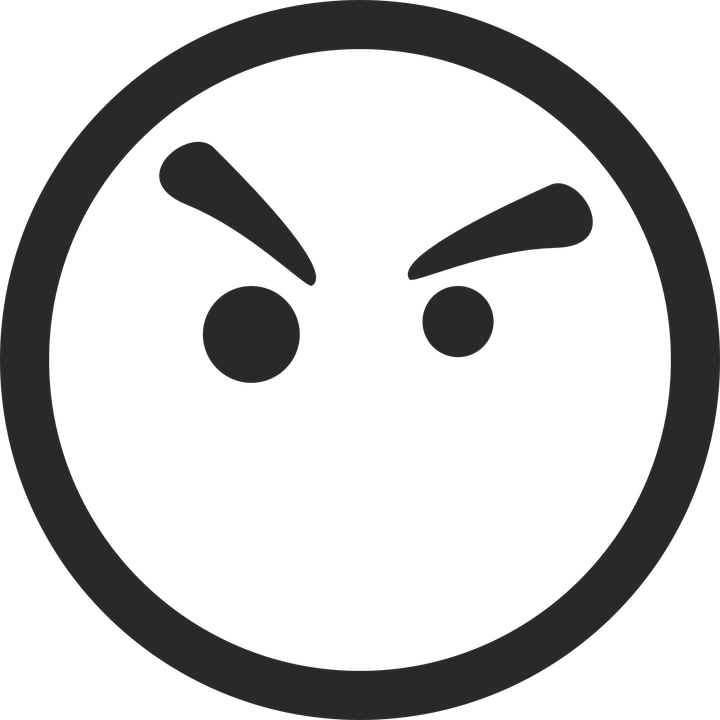

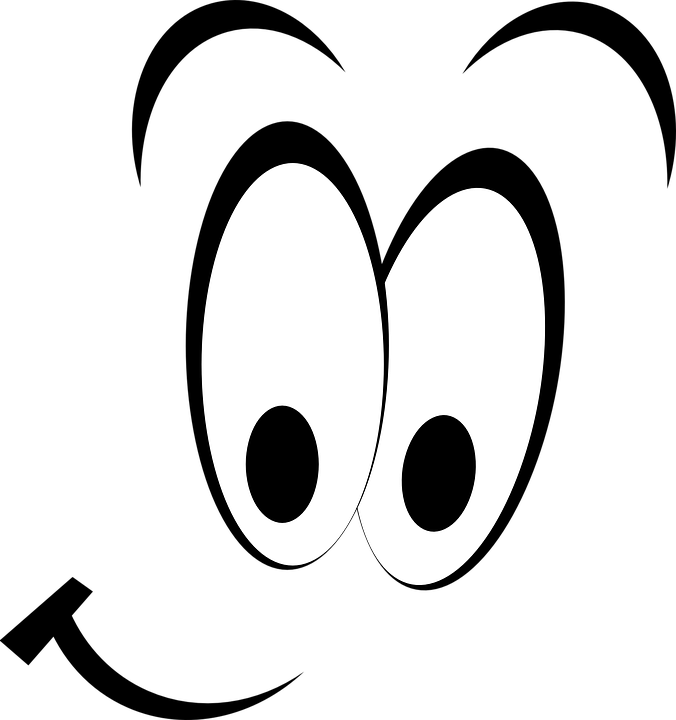

### Positive

In [151]:
pos_mask = np.array(Image.open('smile.png'))

In [156]:
wc = WordCloud(background_color="white", max_words=2000, mask=pos_mask)
clean_string = ','.join(pos_words)
wc.generate(clean_string)

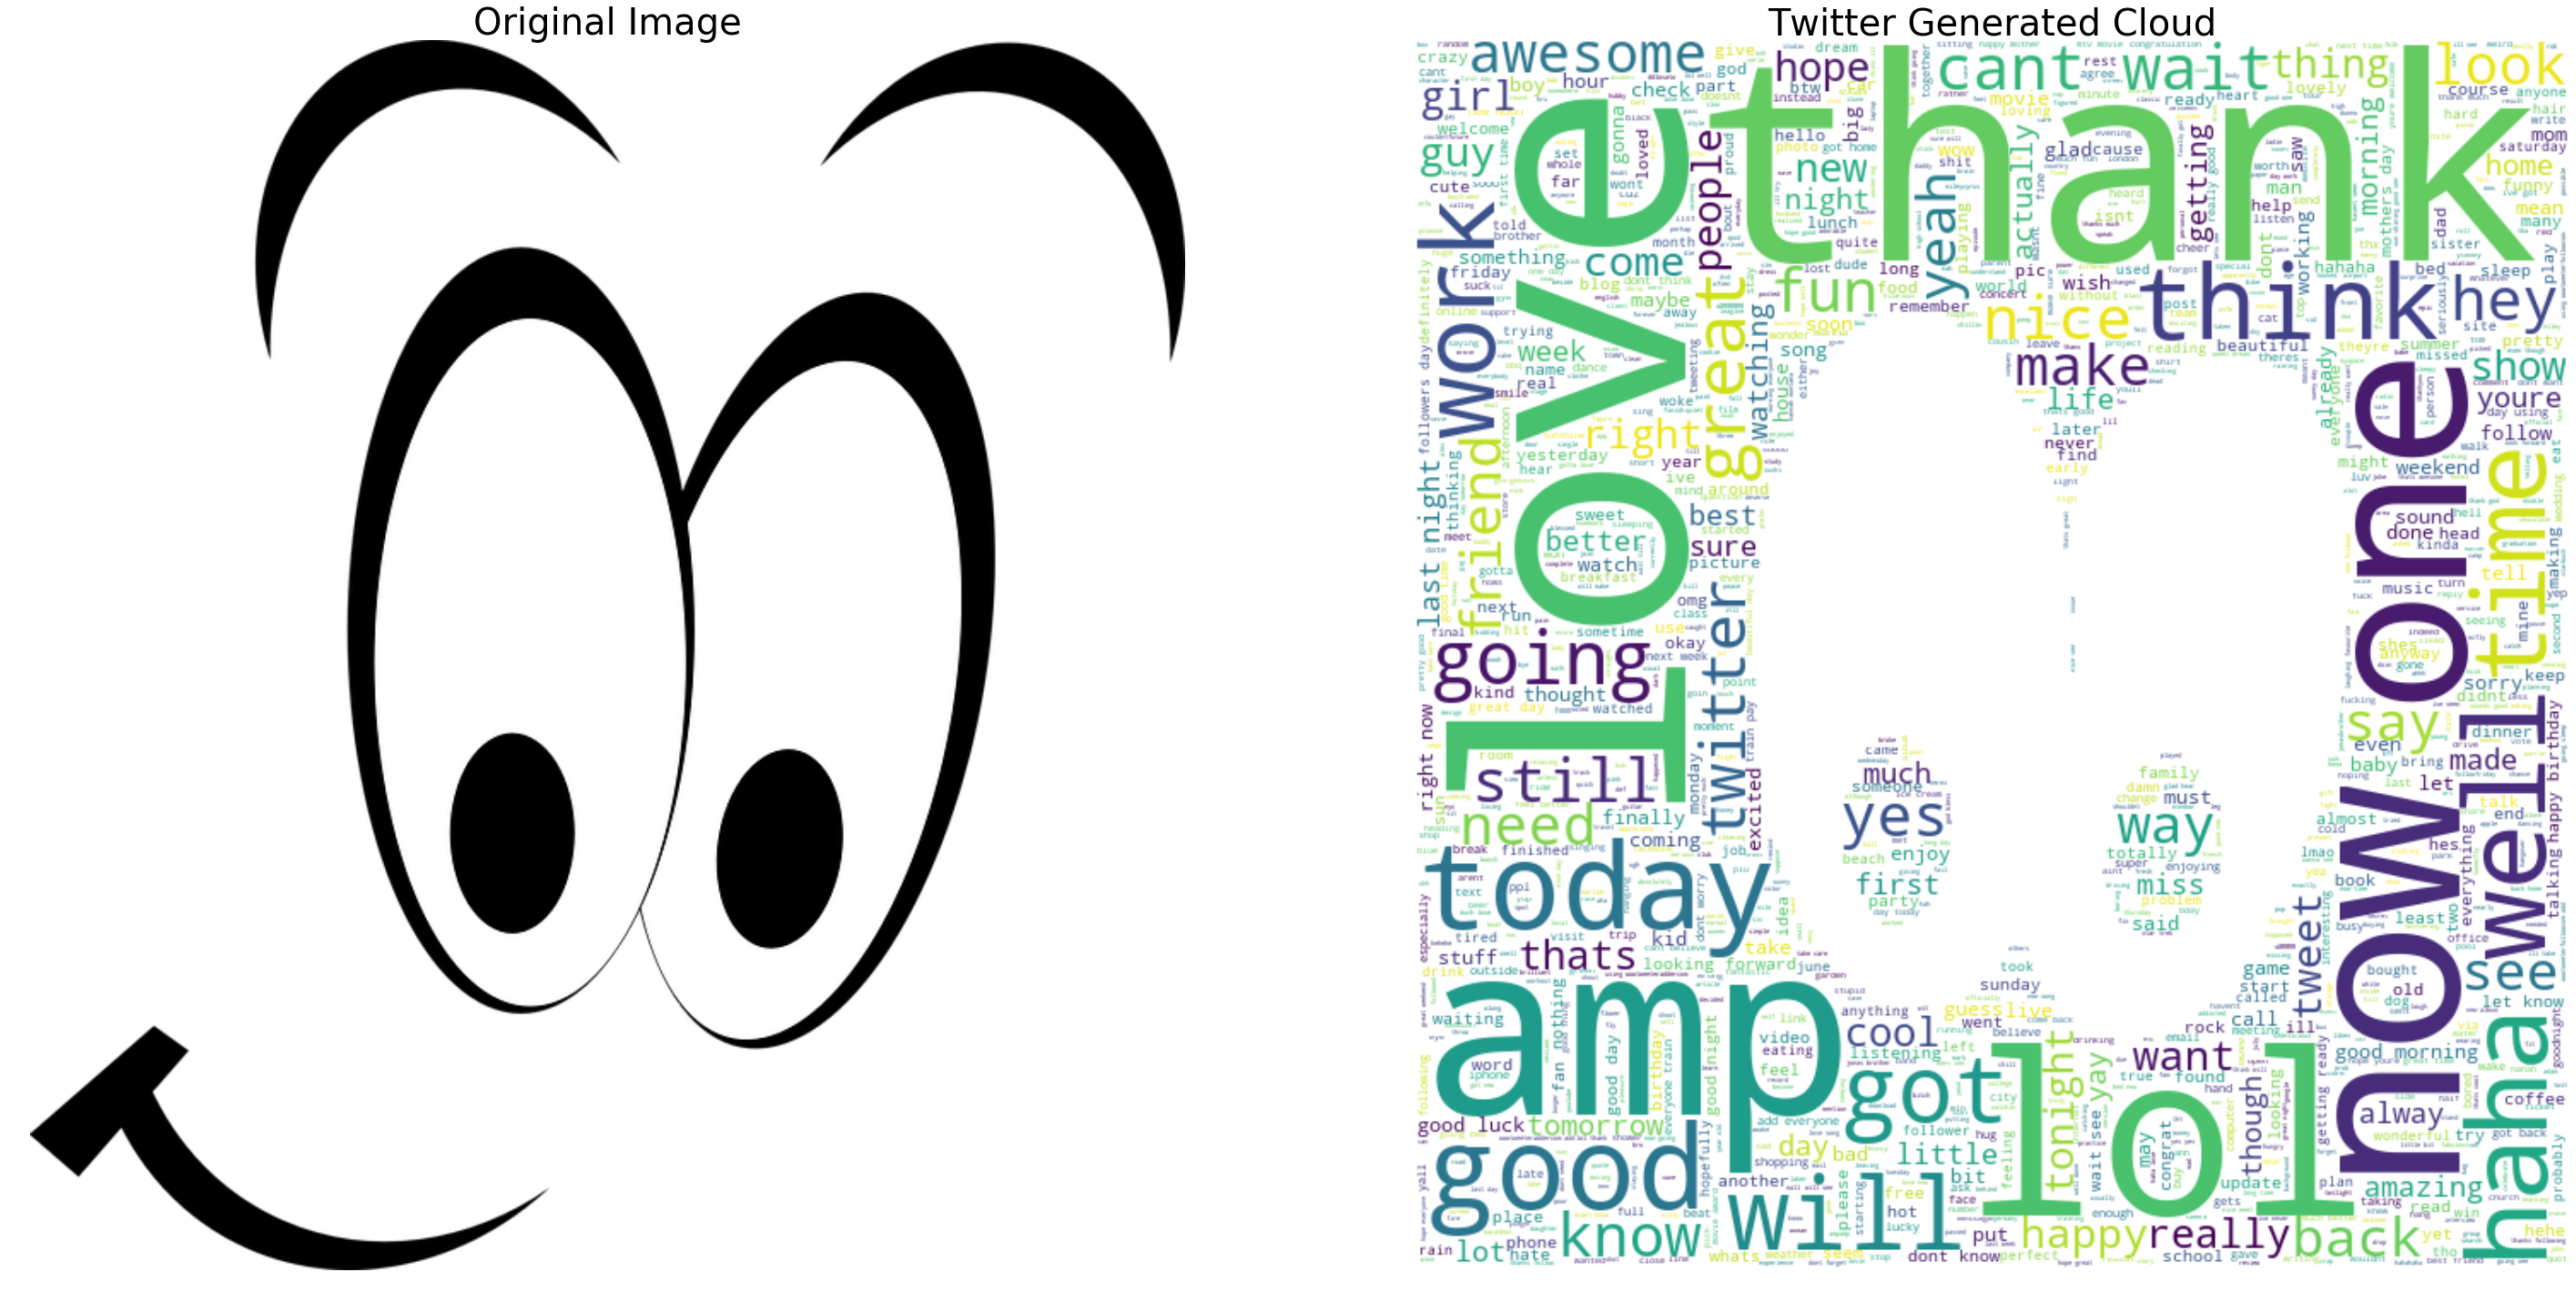

In [157]:
f = plt.figure(figsize=(50,50))
f.add_subplot(1,2, 1)
plt.imshow(pos_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

### Negative

In [161]:
neg_mask = np.array(Image.open('mad.png'))

In [166]:
pos_words[:5]

['love', 'healthuandpets', 'guys', 'bestim', 'meeting']

In [165]:
neg_words[:5]

['switchfoot', 'awww', 'thats', 'bummer', 'shoulda']

In [159]:
neg_wc = WordCloud(background_color="white", max_words=2000, mask=neg_mask)
clean_string = ','.join(neg_words)
neg_wc.generate(clean_string)

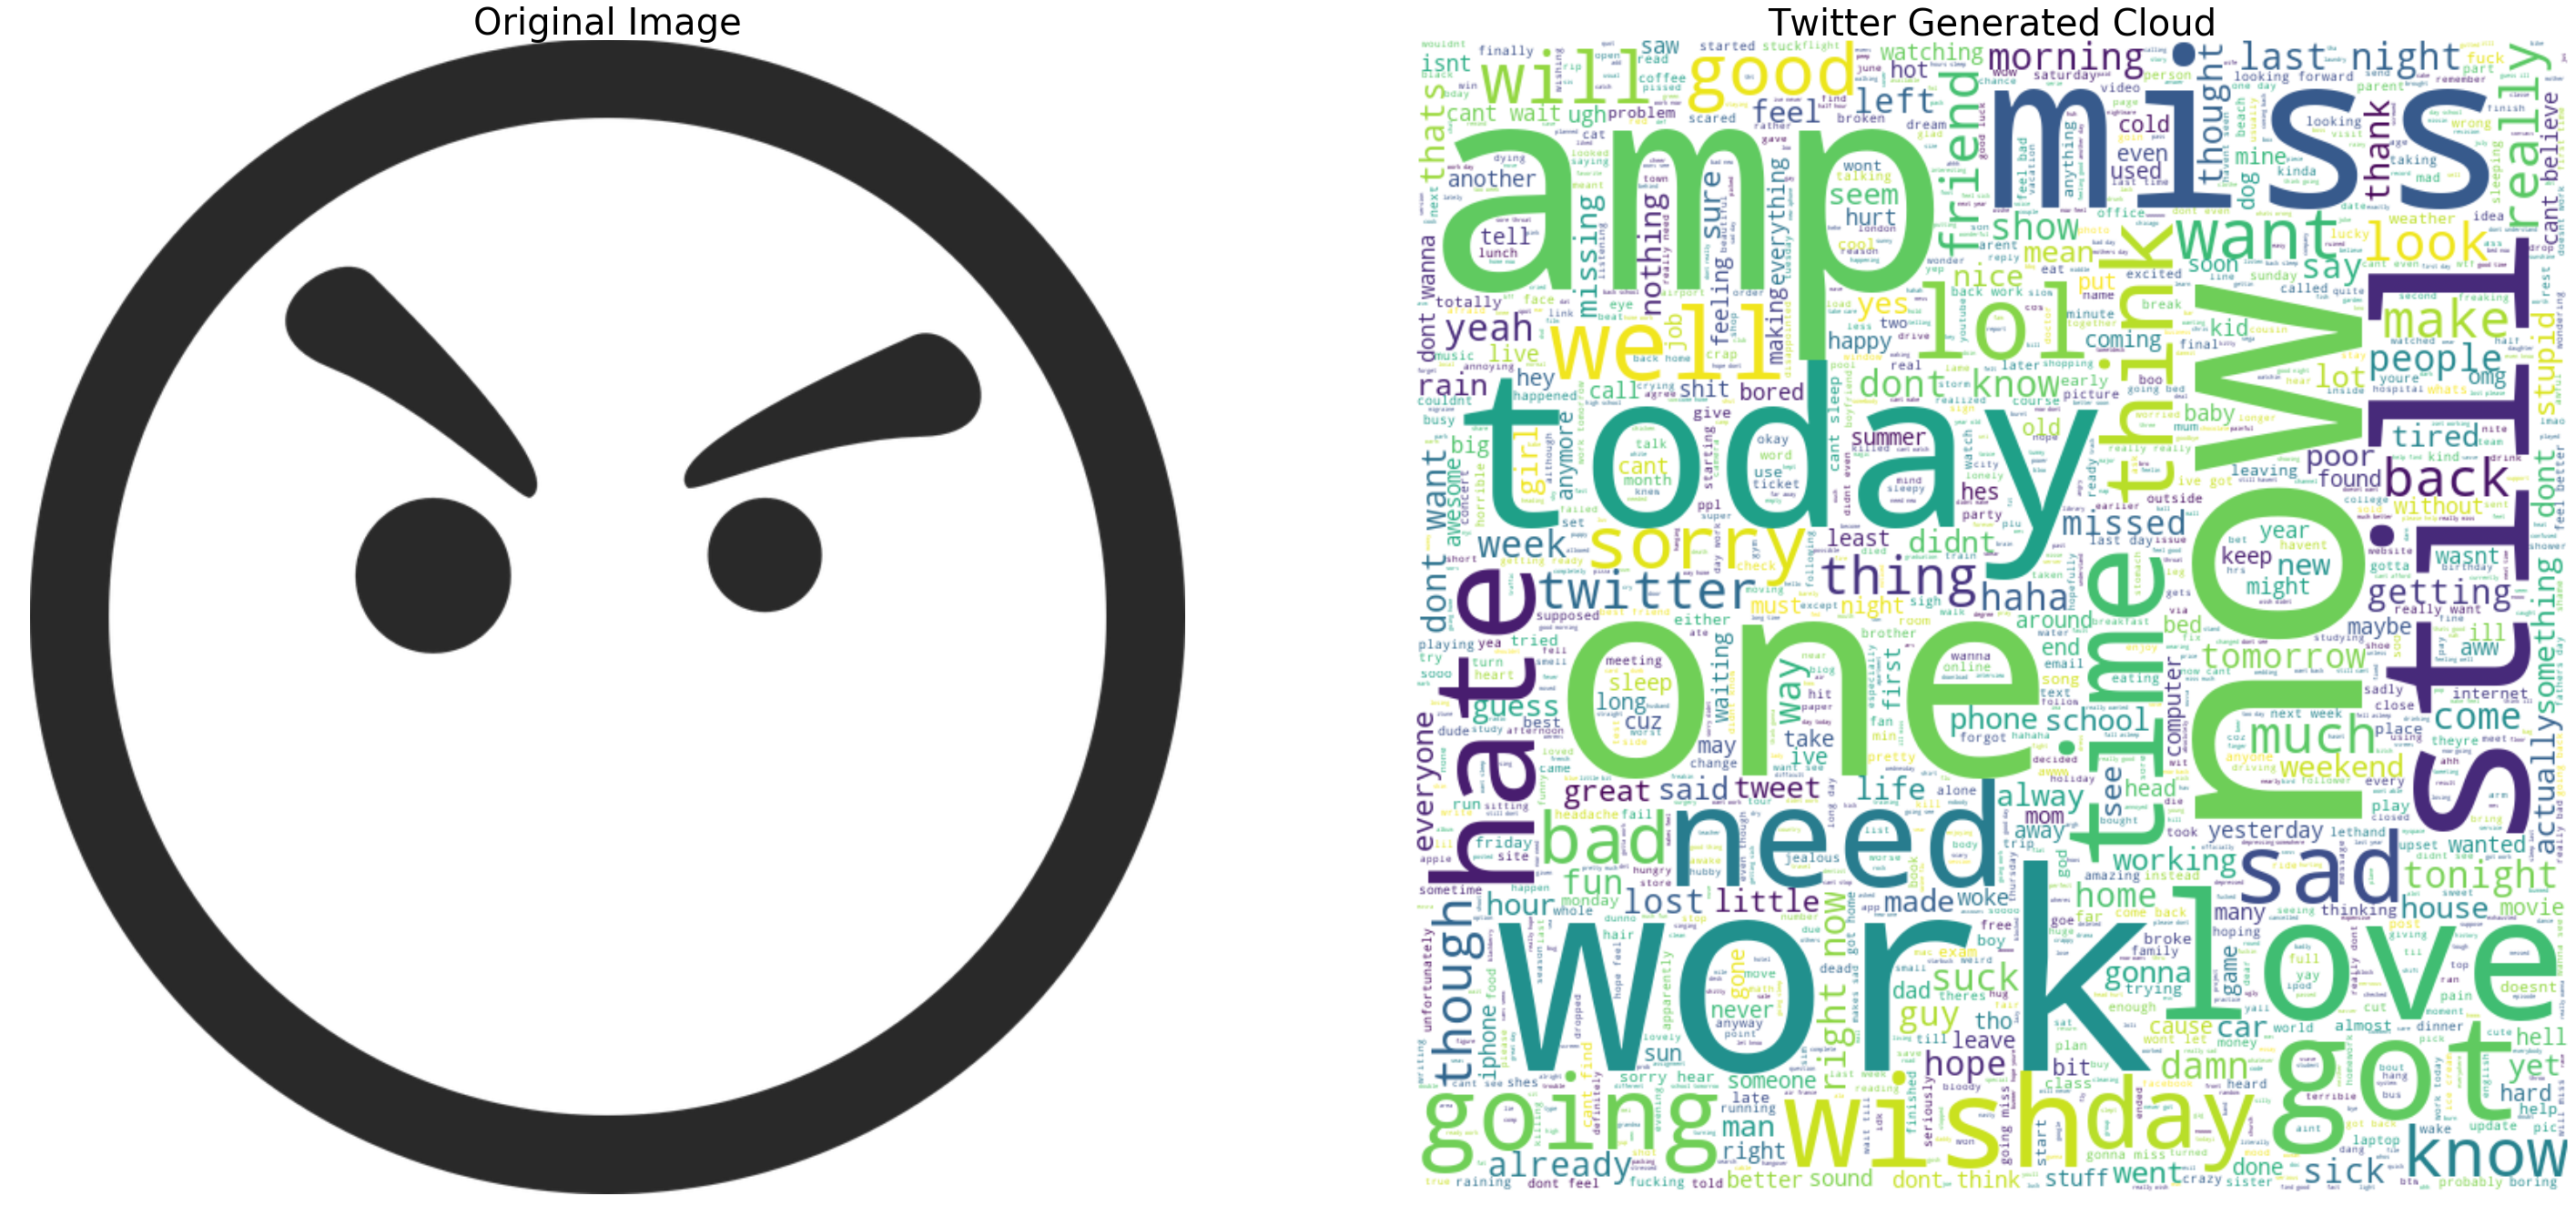

In [170]:
f2 = plt.figure(figsize=(50,50))
f2.add_subplot(1,2, 1)

plt.imshow(neg_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.title('Original Image', size=40)
plt.axis("off")
f2.add_subplot(1,2, 2)

plt.imshow(neg_wc, interpolation='bilinear')
plt.title('Twitter Generated Cloud', size=40)
plt.axis("off")
plt.show()

# SQL MAGIC

In this section, I tried to apply SQL magic to run queries from Python directly. I was successful at making it work. However, the server did not detect indiviual columns from our data set. As such, one cannot run specific queries, for example, using aggregate functions for data analysis. The issue is that I am running the free version of the server, which only allows for one schema. Thus, my account is unable to detect individual columns. 

In [22]:
#module to use magic sql in python

#!pip install ipython-sql

In [23]:
#!pip install ibm-db-sa

In [24]:
import ibm_db_sa

In [25]:
#!pip install ibm-db-sa

In [26]:
import sqlalchemy
sqlalchemy.__version__

'1.3.1'

In [27]:
from sqlalchemy import *

In [28]:
# from sqlalchemy import create_engine

# #e = create_engine("db2+ibm_db://user:pass@host[:port]/database")
# e = create_engine("db2+ibm_db://VWG33041:fvnptbv3w7df%5E81v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB")

In [29]:
import sqlalchemy.dialects

In [30]:
# Connect to database (using magic)

%load_ext sql

In [31]:
# Remember the connection string is of the format:
# %sql ibm_db_sa://my-username:my-password@my-hostname:my-port/my-db-name
# Enter the connection string for your Db2 on Cloud database instance below

%sql ibm_db_sa://VWG33041:fvnptbv3w7df%5E81v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

'Connected: VWG33041@BLUDB'

In [32]:
#%sql ibm_db_sa://vwg33041:fvnptbv3w7df%5E81v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB

#%sql ibm_db_sa://vwg33041:fvnptbv3w7df%5E81v@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50001/BLUDB

In [33]:
#Query 1: Count rows in TWEETS table

# Rows in Crime table

%sql SELECT COUNT(*) \
    FROM TWEETS 

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[(Decimal('1600000'),)]

In [34]:
# Query 2: First 5 rows

%sql SELECT * \
    FROM TWEETS \
    LIMIT 5

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[(0, 0, 1467810369, 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"),
 (1, 0, 1467810672, 'Mon Apr 06 22:19:49 PDT 2009', 'NO_QUERY', 'scotthamilton', "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 (2, 0, 1467810917, 'Mon Apr 06 22:19:53 PDT 2009', 'NO_QUERY', 'mattycus', '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 (3, 0, 1467811184, 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'ElleCTF', 'my whole body feels itchy and like its on fire'),
 (4, 0, 1467811193, 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'Karoli', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ")]

In [38]:
# I get errors when attempting to make queries with specific columns 

%sql SELECT target from TWEETS LIMIT 5;

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0206N  "TARGET" is not valid in the context where it is used.  SQLSTATE=42703\r SQLCODE=-206')
[SQL: SELECT target from TWEETS LIMIT 5;]
(Background on this error at: http://sqlalche.me/e/f405)


In [40]:
#look at TWEETS table

%sql select * \
    from SYSCAT.TABLES \
    where TABNAME = 'TWEETS'

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[('VWG33041', 'TWEETS', 'VWG33041', 'U', 'T', 'N', None, None, None, None, datetime.datetime(2020, 4, 30, 0, 19, 33, 109292), datetime.datetime(2020, 4, 30, 0, 19, 33, 109292), datetime.datetime(2020, 4, 30, 0, 19, 33, 109292), datetime.datetime(2020, 4, 30, 0, 26, 20, 731431), 7, 17, 4906, 1600000, 8181, 0, 8182, -1, -1, -1, 0, 'vwg33041space1', None, None, 0, 0, 0, 0, 0, 0, 0, 'N', 'YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY', 1, ' ', '0', -1, 'N', ' ', None, 'R', ' ', 'N', '                                ', None, 'N', ' ', 'F', None, 0, 'N', 999, 0, 0.0, 166, 0.0, None, 1208, 'SYSIBM', 'IDENTITY', 'SYSIBM', 'IDENTITY', ' ', 0, datetime.datetime(2020, 4, 30, 0, 19, 33, 109292), 0, ' ', None, None, 'N', 'VWG33041', ' ', ' ', ' ', datetime.date(2020, 5, 1), ' ', 'N', 'R', 'N', -1.0, None)]

In [42]:
#Look at columns (clearly, it detects the columns, we just cannot use them in queries)

%sql select distinct(NAME), COLTYPE, LENGTH \
    from SYSIBM.SYSCOLUMNS \
    where TBNAME = 'TWEETS' 

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[('Column_0', 'INTEGER ', 4),
 ('date', 'VARCHAR ', 28),
 ('flag', 'VARCHAR ', 8),
 ('id', 'BIGINT  ', 8),
 ('target', 'SMALLINT', 2),
 ('text', 'VARCHAR ', 717),
 ('user', 'VARCHAR ', 15)]

In [43]:
# I used a different table from the server, and it was working fine 

%sql select distinct(NAME), COLTYPE, LENGTH \
    from SYSIBM.SYSCOLUMNS \
    where TBNAME = 'SCHOOLS' 

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[('10th Grade PLAN (2009)', 'VARCHAR ', 4),
 ('10th Grade PLAN (2010)', 'VARCHAR ', 4),
 ('11th Grade Average ACT (2011)', 'VARCHAR ', 4),
 ('9th Grade EXPLORE (2009)', 'VARCHAR ', 4),
 ('9th Grade EXPLORE (2010)', 'VARCHAR ', 4),
 ('AVERAGE_STUDENT_ATTENDANCE', 'VARCHAR ', 6),
 ('Adequate_Yearly_Progress_Made_', 'VARCHAR ', 3),
 ('Average_Teacher_Attendance', 'VARCHAR ', 6),
 ('COLLEGE_ENROLLMENT', 'SMALLINT', 2),
 ('COMMUNITY_AREA_NAME', 'VARCHAR ', 22),
 ('COMMUNITY_AREA_NUMBER', 'SMALLINT', 2),
 ('CPS_Performance_Policy_Level', 'VARCHAR ', 15),
 ('CPS_Performance_Policy_Status', 'VARCHAR ', 16),
 ('City', 'VARCHAR ', 7),
 ('Collaborative_Name', 'VARCHAR ', 34),
 ('College_Eligibility__', 'VARCHAR ', 4),
 ('College_Enrollment_Rate__', 'VARCHAR ', 4),
 ('Elementary, Middle, or High School', 'VARCHAR ', 2),
 ('Environment_Icon', 'VARCHAR ', 11),
 ('Environment_Score', 'SMALLINT', 2),
 ('Family_Involvement_Icon', 'VARCHAR ', 11),
 ('Family_Involvement_Score', 'VARCHAR ', 3),
 ('Freshman_on_Track_Rate__', 'VARCHAR ', 4),
 ('General_Services_Route', 'SMALLINT', 2),
 ('Gr3_5_Grade_Level_Math__', 'VARCHAR ', 4),
 ('Gr3_5_Grade_Level_Read__', 'VARCHAR ', 4),
 ('Gr3_5_Keep_Pace_Math__', 'VARCHAR ', 4),
 ('Gr3_5_Keep_Pace_Read__', 'VARCHAR ', 4),
 ('Gr6_8_Grade_Level_Math__', 'VARCHAR ', 4),
 ('Gr6_8_Grade_Level_Read__', 'VARCHAR ', 4),
 ('Gr6_8_Keep_Pace_Math_', 'VARCHAR ', 4),
 ('Gr6_8_Keep_Pace_Read__', 'VARCHAR ', 4),
 ('Gr_8_Explore_Math__', 'VARCHAR ', 4),
 ('Gr_8_Explore_Read__', 'VARCHAR ', 4),
 ('Graduation_Rate__', 'VARCHAR ', 4),
 ('HEALTHY_SCHOOL_CERTIFIED', 'VARCHAR ', 3),
 ('ISAT_Exceeding_Math__', 'DECIMAL ', 4),
 ('ISAT_Exceeding_Reading__', 'DECIMAL ', 4),
 ('ISAT_Value_Add_Color_Math', 'VARCHAR ', 6),
 ('ISAT_Value_Add_Color_Read', 'VARCHAR ', 6),
 ('ISAT_Value_Add_Math', 'DECIMAL ', 3),
 ('ISAT_Value_Add_Read', 'DECIMAL ', 3),
 ('Individualized_Education_Program_Compliance_Rate', 'VARCHAR ', 7),
 ('Instruction_Icon', 'VARCHAR ', 11),
 ('Instruction_Score', 'SMALLINT', 2),
 ('Latitude', 'DECIMAL ', 18),
 ('Leaders_Icon', 'VARCHAR ', 11),
 ('Leaders_Score', 'VARCHAR ', 3),
 ('Link', 'VARCHAR ', 78),
 ('Location', 'VARCHAR ', 27),
 ('Longitude', 'DECIMAL ', 18),
 ('NAME_OF_SCHOOL', 'VARCHAR ', 65),
 ('Net_Change_EXPLORE_and_PLAN', 'VARCHAR ', 3),
 ('Net_Change_PLAN_and_ACT', 'VARCHAR ', 3),
 ('Network_Manager', 'VARCHAR ', 40),
 ('Parent_Engagement_Icon', 'VARCHAR ', 7),
 ('Parent_Engagement_Score', 'VARCHAR ', 3),
 ('Parent_Environment_Icon', 'VARCHAR ', 7),
 ('Parent_Environment_Score', 'VARCHAR ', 3),
 ('Phone_Number', 'VARCHAR ', 14),
 ('Pk_2_Literacy__', 'VARCHAR ', 4),
 ('Pk_2_Math__', 'VARCHAR ', 4),
 ('Police_District', 'SMALLINT', 2),
 ('Rate_of_Misconducts__per_100_students_', 'DECIMAL ', 5),
 ('SAFETY_SCORE', 'SMALLINT', 2),
 ('Safety_Icon', 'VARCHAR ', 11),
 ('School_ID', 'INTEGER ', 4),
 ('State', 'VARCHAR ', 2),
 ('Street_Address', 'VARCHAR ', 30),
 ('Students_Passing__Algebra__', 'VARCHAR ', 4),
 ('Students_Taking__Algebra__', 'VARCHAR ', 4),
 ('Teachers_Icon', 'VARCHAR ', 11),
 ('Teachers_Score', 'VARCHAR ', 3),
 ('Track_Schedule', 'VARCHAR ', 12),
 ('Ward', 'SMALLINT', 2),
 ('X_COORDINATE', 'DECIMAL ', 13),
 ('Y_COORDINATE', 'DECIMAL ', 13),
 ('ZIP_Code', 'INTEGER ', 4)]

In [58]:
%sql SELECT DISTINCT *\
    FROM TWEETS \
    LIMIT 5

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[(0, 0, 1467810369, 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY', '_TheSpecialOne_', "@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"),
 (1, 0, 1467810672, 'Mon Apr 06 22:19:49 PDT 2009', 'NO_QUERY', 'scotthamilton', "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"),
 (2, 0, 1467810917, 'Mon Apr 06 22:19:53 PDT 2009', 'NO_QUERY', 'mattycus', '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'),
 (3, 0, 1467811184, 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'ElleCTF', 'my whole body feels itchy and like its on fire'),
 (4, 0, 1467811193, 'Mon Apr 06 22:19:57 PDT 2009', 'NO_QUERY', 'Karoli', "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ")]

In [74]:
# the 'user' column refers to my username for the IBM account, clearly the limitations of a free account are apparent

%sql select user from tweets limit 5  

#%sql Select user from VWG33041.TWEETS limit 5

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
Done.


[('VWG33041',), ('VWG33041',), ('VWG33041',), ('VWG33041',), ('VWG33041',)]

In [78]:
# SELECT Table_1.Col_1
#   FROM Schema.Table_1
# WHERE Table_1.Col_1 = 'ABCD'

%sql select flag from VWG33041.TWEETS limit 5  

 * ibm_db_sa://VWG33041:***@dashdb-txn-sbox-yp-dal09-03.services.dal.bluemix.net:50000/BLUDB
(ibm_db_dbi.ProgrammingError) ibm_db_dbi::ProgrammingError: Exception('SQLNumResultCols failed: [IBM][CLI Driver][DB2/LINUXX8664] SQL0206N  "FLAG" is not valid in the context where it is used.  SQLSTATE=42703\r SQLCODE=-206')
[SQL: select flag from VWG33041.TWEETS limit 5]
(Background on this error at: http://sqlalche.me/e/f405)


In [35]:
#always close connection before closing notebook

#ibm_db.close(conn)

It would have been nice to run SQL from Python, but unfortunately, IBM gave us the most limited abilities with the free account. Nonetheless, extracting the table and converting it into a data frame using Pandas is a nice trick that can be applied to future projects. 